"Titanic" is a 1997 American epic romance and disaster film directed, written, produced, and co-edited by James Cameron. The plot centers on the fictional RMS Titanic, a British passenger liner, which sinks in the North Atlantic Ocean after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. The movie stars Kate Winslet and Leonardo DiCaprio as members of different social classes who fall in love aboard the ship during its ill-fated maiden voyage. The film also features Billy Zane, Kathy Bates, Frances Fisher, Gloria Stuart, Bernard Hill, Jonathan Hyde, Victor Garber, and Bill Paxton.

In order to relfect the realities of early 1900s cruise across the Atlantic, James Cameron compiled a now-famous data set of 2224 passengers and crew. He then assument that there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 people.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The goal of this notebook it to try asses the factors that migth have lead to survival and to allow to predict the fate of each passenger.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_theme(style = "dark")

In [30]:
titanic_df = pd.read_csv("titanic.csv")

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
survived_df = titanic_df[titanic_df["Survived"] == 1]
no_survived_df = titanic_df[titanic_df["Survived"] == 0]

In [33]:
print("Total:", len(titanic_df))
print("Number of passengers who survived:", len(survived_df), len(survived_df) / len(titanic_df))
print("Number of passengers who did not survive:", len(no_survived_df), len(no_survived_df) / len(titanic_df))

Total: 891
Number of passengers who survived: 342 0.3838383838383838
Number of passengers who did not survive: 549 0.6161616161616161


<Axes: xlabel='Pclass', ylabel='count'>

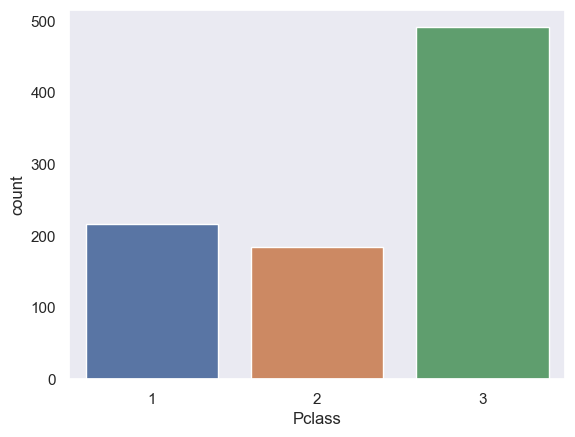

In [34]:
sns.countplot(x = "Pclass", data = titanic_df)

<Axes: xlabel='Pclass', ylabel='count'>

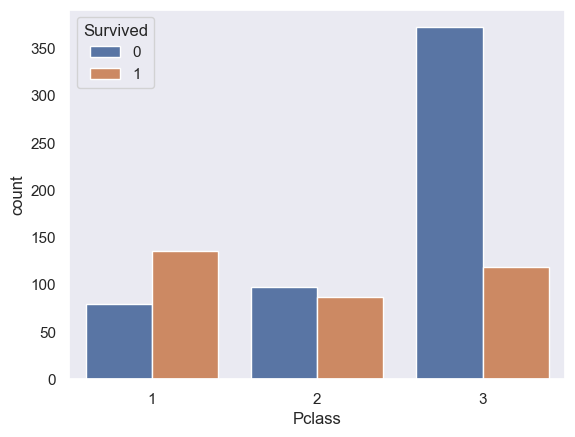

In [35]:
sns.countplot(x = "Pclass", hue = "Survived", data = titanic_df)

<Axes: xlabel='SibSp', ylabel='count'>

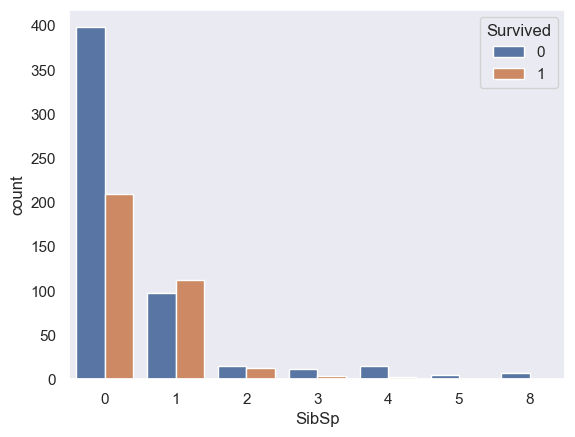

In [36]:
sns.countplot(x = "SibSp", hue = "Survived", data = titanic_df)

<Axes: xlabel='Parch', ylabel='count'>

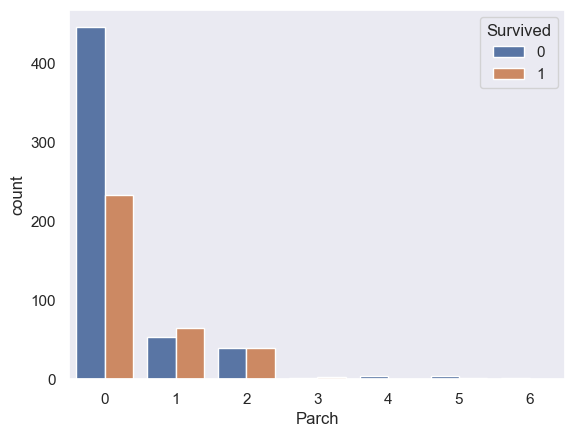

In [37]:
sns.countplot(x = "Parch", hue = "Survived", data = titanic_df)

<Axes: xlabel='Sex', ylabel='count'>

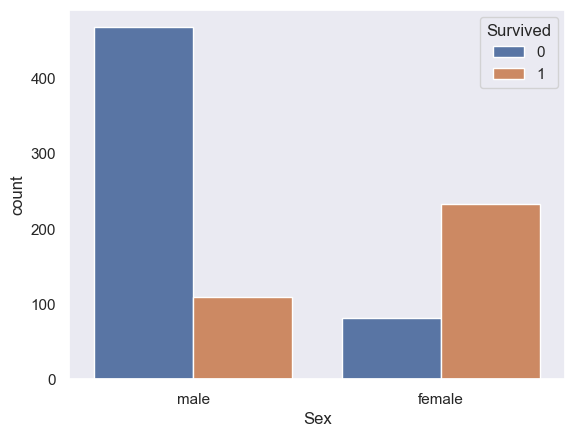

In [38]:
sns.countplot(x = "Sex", hue = "Survived", data = titanic_df)

<Axes: >

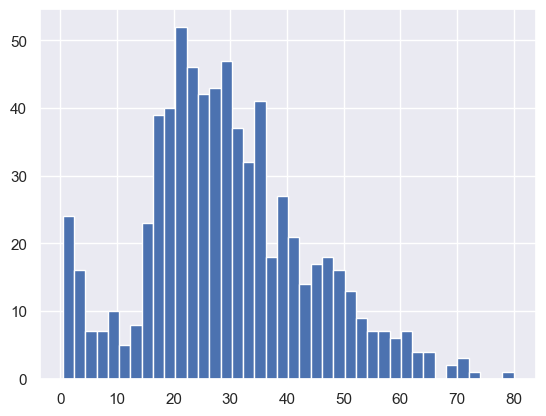

In [39]:
titanic_df["Age"].hist(bins = 40)

<Axes: >

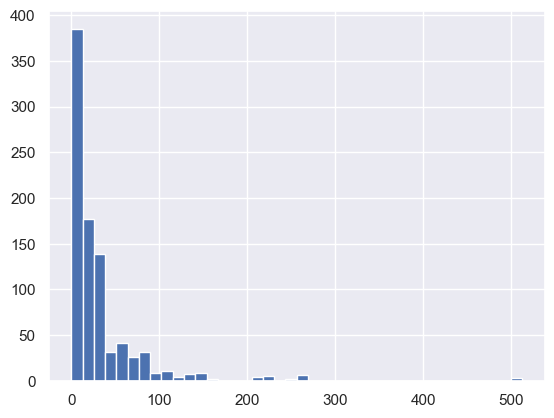

In [40]:
titanic_df["Fare"].hist(bins = 40)